# IMPORT LIBRARY

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DATA DICTIONARY

In [55]:
df = pd.read_csv("jabodetabek_house_price.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

# KUALITAS DATA

### 1. Kolom Fitur Numerik

In [56]:
numeric_cols =  df.select_dtypes(include=['number']).columns
display(numeric_cols)

Index(['price_in_rp', 'lat', 'long', 'bedrooms', 'bathrooms', 'land_size_m2',
       'building_size_m2', 'carports', 'maid_bedrooms', 'maid_bathrooms',
       'floors', 'building_age', 'year_built', 'garages'],
      dtype='object')

### 2. Kolom Fitur Kategorik

In [57]:
category_cols =  df.select_dtypes(include=['object']).columns
display(category_cols)

Index(['url', 'title', 'address', 'district', 'city', 'facilities',
       'property_type', 'ads_id', 'certificate', 'electricity',
       'property_condition', 'building_orientation', 'furnishing'],
      dtype='object')

### 3. Missing Values

In [58]:
df.isnull().sum()

url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64

### 4. Data Duplikat

In [59]:
print("banyak data duplikat : ", df.duplicated().sum())

banyak data duplikat :  0


### 5. Outliers

In [60]:
outlier_counts = {}
for col in df[numeric_cols]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count how many are outside the range
    count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_counts[col] = count
outlier_counts = pd.DataFrame(data = outlier_counts.items(), columns=['Column', 'Outlier Count'])
display(outlier_counts)

,Column,Outlier Count
0,price_in_rp,385
1,lat,40
2,long,7
3,bedrooms,37
4,bathrooms,197
5,land_size_m2,372
6,building_size_m2,327
7,carports,104
8,maid_bedrooms,44
9,maid_bathrooms,11


# EDA

### 1. Heat Map

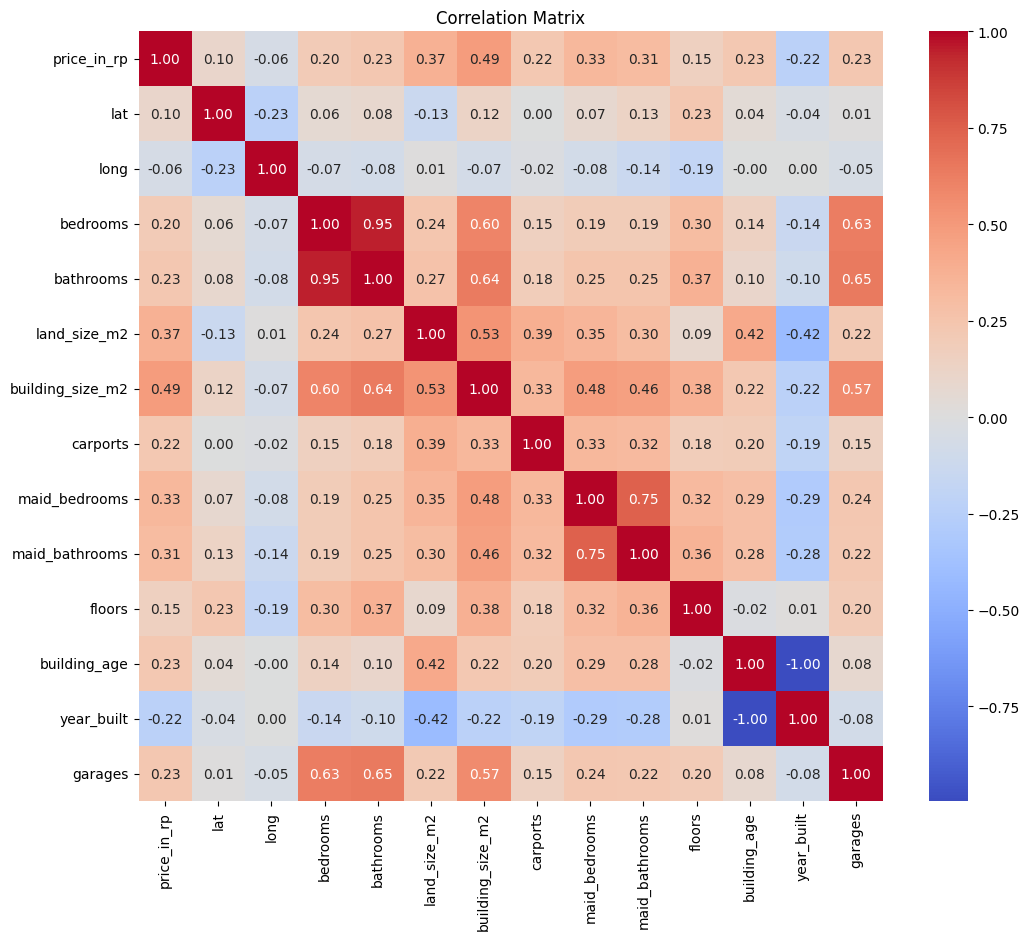

In [61]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 2. Pairplot

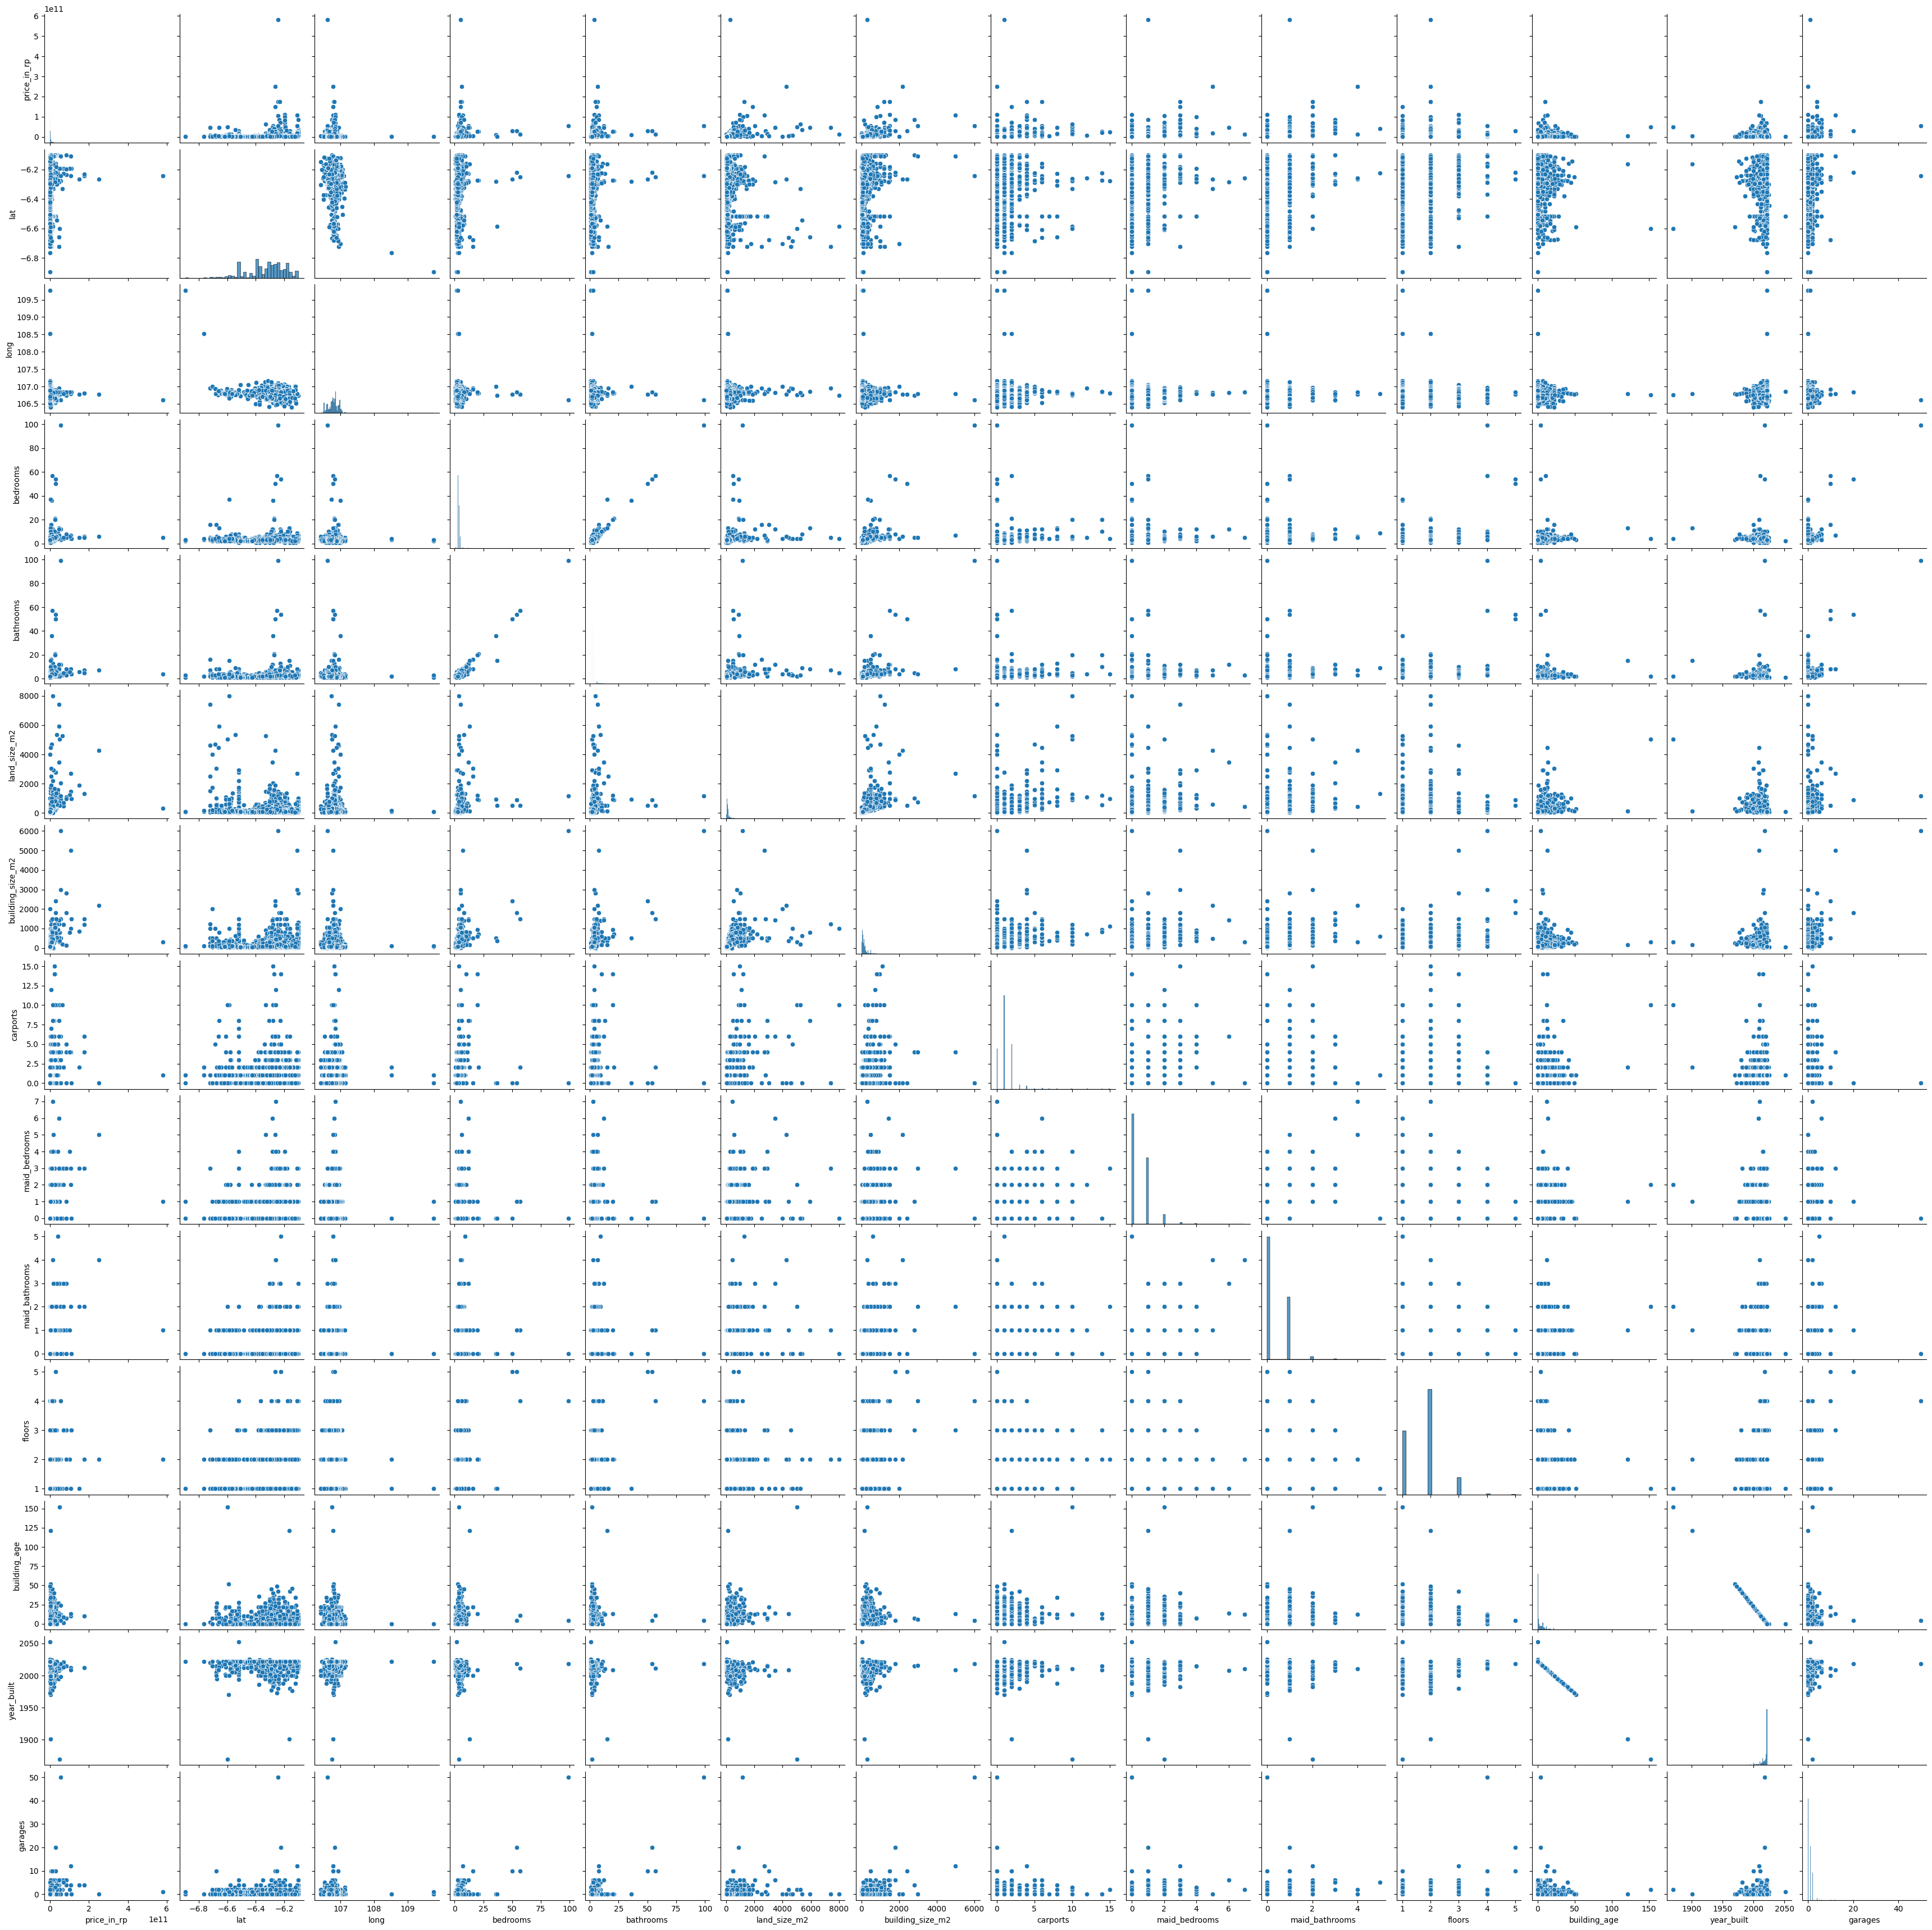

In [62]:
sns.pairplot(df[numeric_cols])
plt.show()

### 3. Histogram

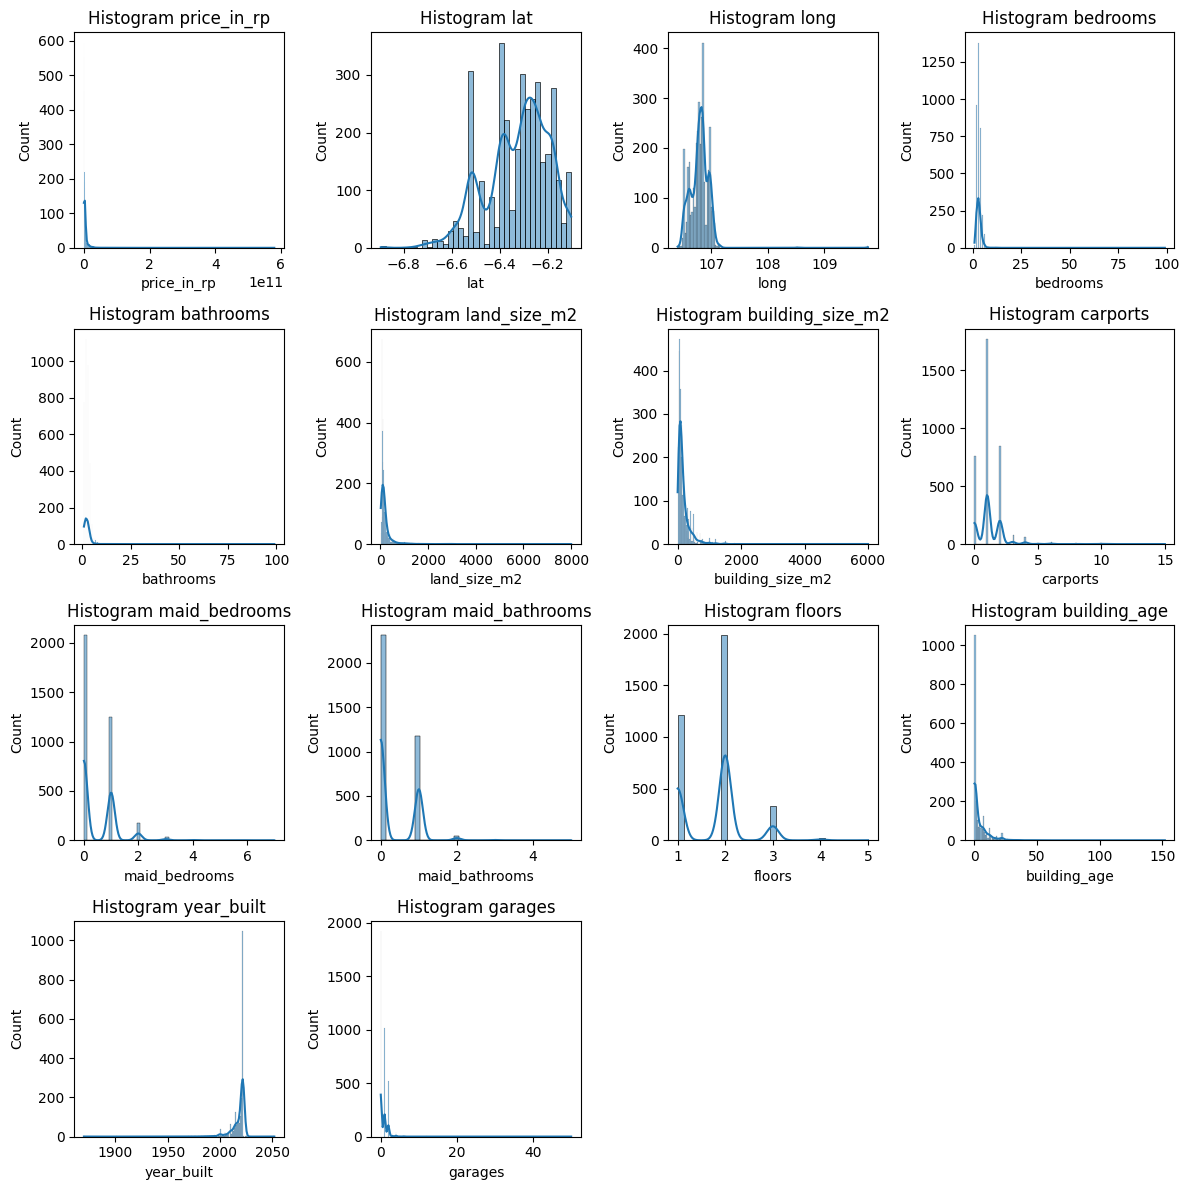

In [63]:
plt.figure(figsize=(12, 12)) 
for i,n in enumerate (numeric_cols,1) :
    plt.subplot(4, 4, i)
    sns.histplot(df[n], kde=True)
    plt.title(f"Histogram {n}")
    plt.tight_layout()
plt.show()

### 4. Box Plot

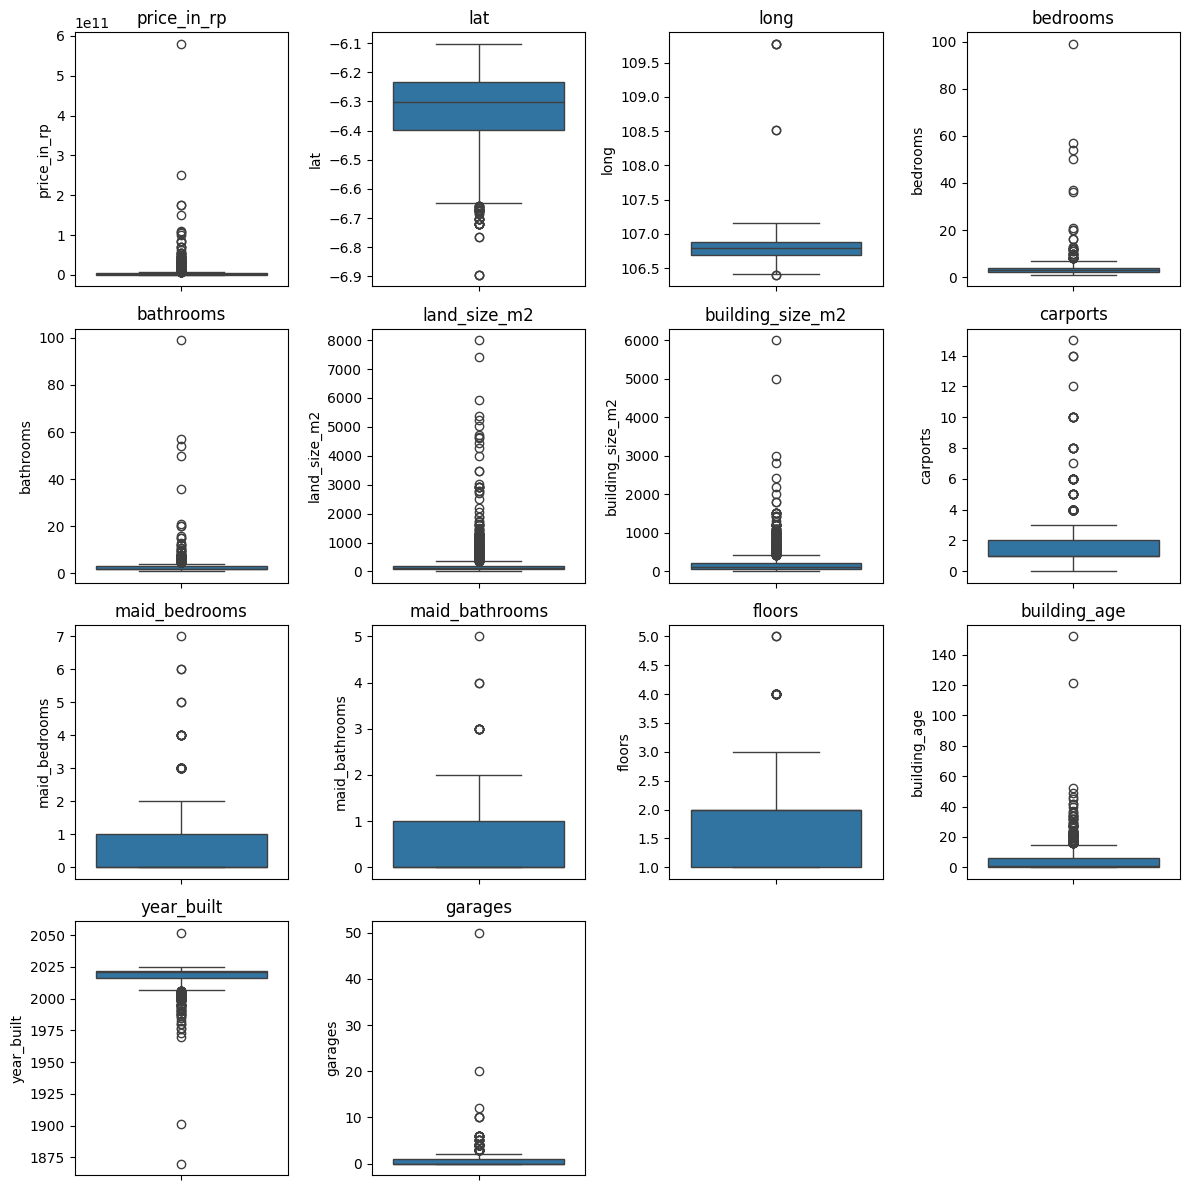

In [64]:
plt.figure(figsize=(12, 12)) 
for i,n in enumerate (numeric_cols,1) :
    plt.subplot(4, 4, i)
    sns.boxplot(df[n])
    plt.title(f"{n}")
    plt.tight_layout()
plt.show()

End of code